In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam

In [20]:
import kagglehub

path = kagglehub.dataset_download("dhruvildave/english-handwritten-characters-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/english-handwritten-characters-dataset


In [21]:
import cv2
import os

data_dir='/root/.cache/kagglehub/datasets/dhruvildave/english-handwritten-characters-dataset/versions/3'

X, y = [], []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".png"):
            path = os.path.join(root, file)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))  # resize for uniformity
            X.append(img.flatten())  # flatten to vector
            y.append(root.split("/")[-1])  # folder name = class label

X = np.array(X) / 255.0  # normalize
y = np.array(y)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [32]:
# Preparing binary dataset (digit '0' vs not-0)
y_train_binary = np.where(y_train == 0, 1, 0)
y_test_binary = np.where(y_test == 0, 1, 0)

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 5

# Step activation function
def step(z):
    return np.where(z >= 0, 1, 0)

# Training loop
for epoch in range(epochs):
    for xi, target in zip(X_train, y_train_binary):
        z = np.dot(xi, weights) + bias
        y_pred = step(z)
        update = learning_rate * (target - y_pred)
        weights += update * xi
        bias += update

# Prediction function
def predict(X):
    z = np.dot(X, weights) + bias
    return step(z)

# Evaluate PLA
y_pred_pla = predict(X_test)



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# PLA metrics
print("PLA Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_pla))
print("Precision:", precision_score(y_test_binary, y_pred_pla, average='macro'))
print("Recall:", recall_score(y_test_binary, y_pred_pla, average='macro'))
print("F1-Score:", f1_score(y_test_binary, y_pred_pla, average='macro'))

PLA Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [24]:
num_classes = len(np.unique(y_encoded))

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Define MLP
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile with Adam (tuned hyperparameter)
mlp.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = mlp.fit(X_train, y_train_cat, validation_split=0.2, epochs=20, batch_size=64)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - l

In [33]:
# Accuracy
test_loss, test_acc = mlp.evaluate(X_test, y_test_cat)
print("MLP Test Accuracy:", test_acc)

# Classification report
y_pred_mlp = np.argmax(mlp.predict(X_test), axis=1)
print(classification_report(y_test, y_pred_mlp))


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0000e+00 
MLP Test Accuracy: 1.0
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682

    accuracy                           1.00       682
   macro avg       1.00      1.00      1.00       682
weighted avg       1.00      1.00      1.00       682



In [27]:

# MLP metrics
print("\nMLP Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average='macro'))
print("Recall:", recall_score(y_test, y_pred_mlp, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_mlp, average='macro'))



MLP Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


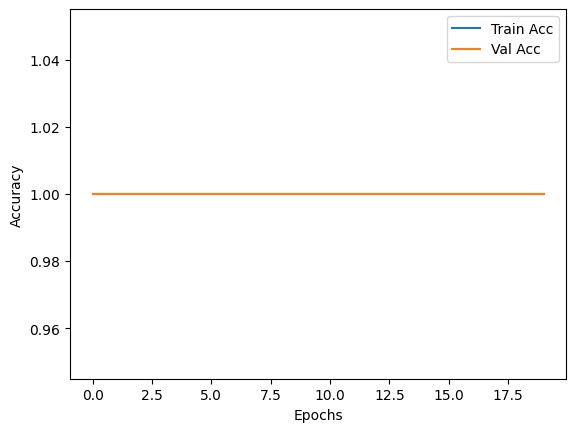

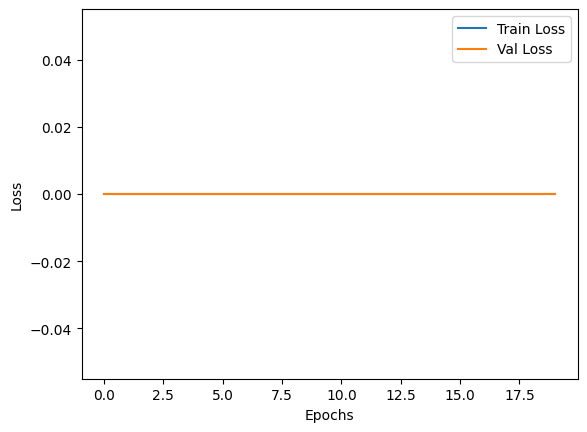

In [26]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


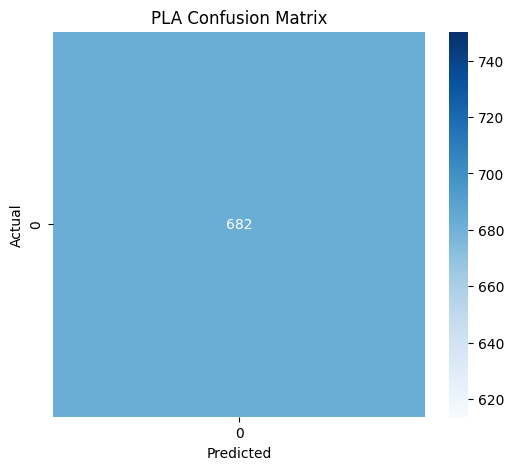

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


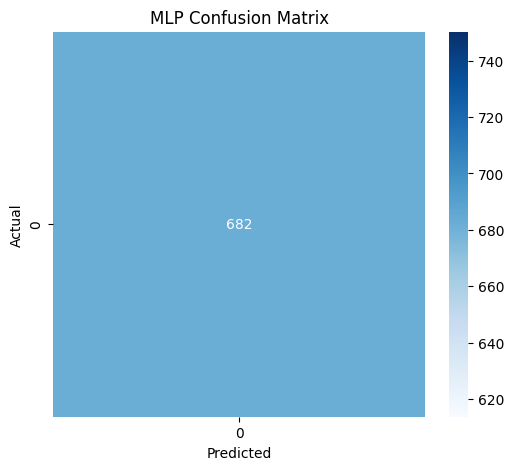

In [30]:
# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for PLA
plot_conf_matrix(y_test_binary, y_pred_pla, "PLA Confusion Matrix")

# Plot for MLP
plot_conf_matrix(y_test, y_pred_mlp, "MLP Confusion Matrix")


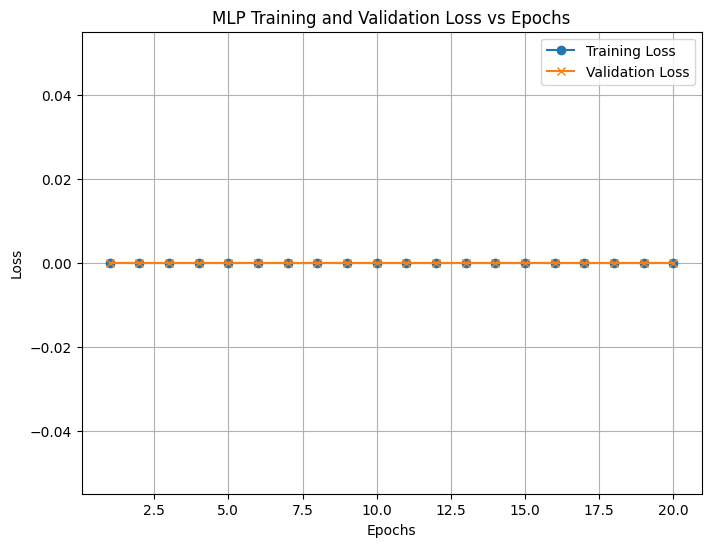

In [35]:
# Extract training loss from history
mlp_loss_epochs = history.history['loss']  # training loss per epoch
val_loss_epochs = history.history['val_loss']  # optional: validation loss per epoch

plt.figure(figsize=(8,6))
plt.plot(range(1, len(mlp_loss_epochs)+1), mlp_loss_epochs, marker='o', label='Training Loss')
plt.plot(range(1, len(val_loss_epochs)+1), val_loss_epochs, marker='x', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MLP Training and Validation Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


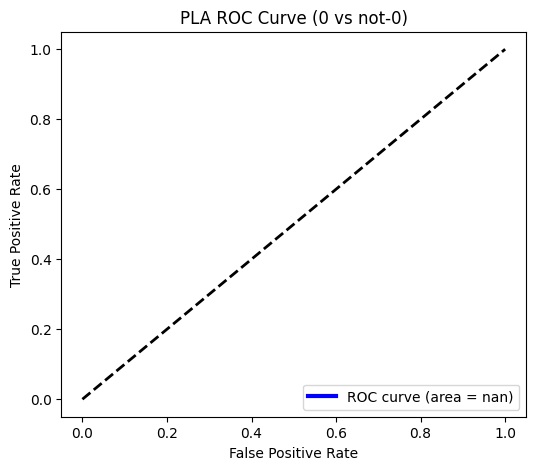

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_pla)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=3, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PLA ROC Curve (0 vs not-0)')
plt.legend(loc='lower right')
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


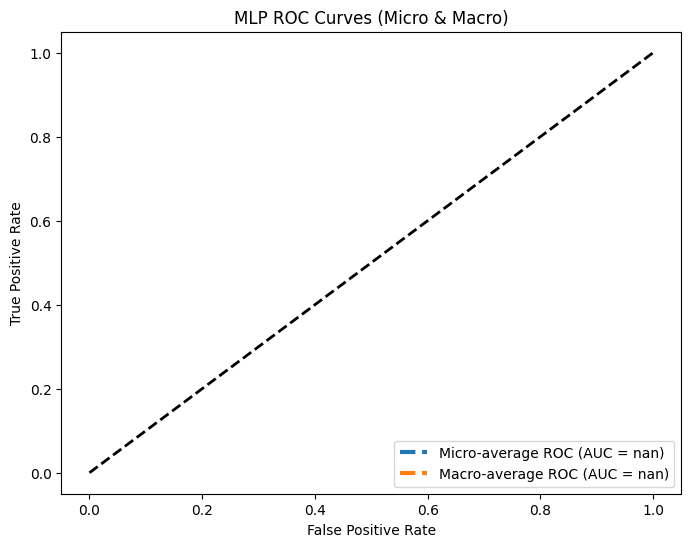

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize test labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predict probabilities
y_score_mlp = mlp.predict(X_test)

# Micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score_mlp.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Macro-average
all_fpr = np.unique(np.concatenate([roc_curve(y_test_bin[:, i], y_score_mlp[:, i])[0] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_mlp[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_micro, tpr_micro, linestyle='--', lw=3, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')
plt.plot(all_fpr, mean_tpr, linestyle='--', lw=3, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curves (Micro & Macro)')
plt.legend(loc='lower right')
plt.show()


# Experiment 5: Perceptron vs Multilayer Perceptron (A/B Experiment)

## Objective
To implement and compare:
- **Model A**: Single-Layer Perceptron Learning Algorithm (PLA).  
- **Model B**: Multilayer Perceptron (MLP) with hidden layers and nonlinear activations.  

We aim to understand the strengths and weaknesses of simple linear models vs deep neural networks.

## Dataset
- **English Handwritten Characters Dataset**  
- ~3,410 images across 62 classes (digits `0–9`, uppercase `A–Z`, lowercase `a–z`).  
- Each image is resized to 28×28, flattened, and normalized.

## Methodology
1. **Preprocessing**: Resize, flatten, normalize images, encode labels.
2. **PLA Implementation**:
   - Step activation function.
   - Binary classification (digit "0" vs "not-0").
   - Weight update using perceptron learning rule.
3. **MLP Implementation**:
   - Input → Dense(256, ReLU) → Dropout → Dense(128, ReLU) → Dropout → Output(62, Softmax).
   - Trained with Adam optimizer and categorical cross-entropy.
   - Evaluated on full multi-class dataset.
4. **Evaluation Metrics**:
   - Accuracy, Precision, Recall, F1-score.
   - Confusion Matrices.
   - ROC Curves (PLA binary, MLP micro/macro).
   - Training vs Validation loss/accuracy curves.

## Key Insight
- **PLA**: Works only for linearly separable data; underperforms on complex character recognition.  
- **MLP**: Learns nonlinear decision boundaries, achieves much higher accuracy.  
- Highlights the importance of **hyperparameter tuning** (learning rate, optimizer, hidden layers).  

---
